# Experimental Data Analysis of NCAA Basketball Statistics

## Authored By: Brandon Clark and Ben Comer

## Equations Used:
* The covariance can also be used to assess correlation: 
$cov=\frac{\sum_{i=1}^{n}(x_i -\bar{x})(y_i -\bar{y})}{n}$

* The correlation coefficient $r$ helps checks how good the linear relationship is: 
$r=\frac{cov}{\sigma_x\sigma_y}$

* Calculate the slope using the means (where n is the number of data points): 
$m =\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$


* Calculate the y intercept as
$b = \bar{y}-m\bar{x}$

* $Scoring Margin = \frac{PPG}{Opponents PPG}$

* $Effective Field Goal Percentage= \frac{3PM*1.5 + 2PM}{3PA + 2PA}$

* $2 Pointers Made = FGM - 3FG$



## Process of Coding
* The required columns were loaded into NCAA_statistics_parsed.csv after being calculated with the neccessary functions.
* In order to get the data I needed, I read in all of my files using mypytable csv reader. Then, I got all of the columns I needed using the get column function I have in mypytable.
* In order to make the graphs I needed, I used reusable functions I made that use matplotlib in plot_utils.py. 
* In order to get values such as correlation, slope intercept, and covariance, I have reusable functions that are in plot_utils.py.

In [24]:
import matplotlib.pyplot as plt
import importlib
import os
import numpy as np
# some useful mysklearn package import statements and reloads

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

ncaa_facts = os.path.join("input_data","NCAA_Statistics_Parsed.csv")
ncaa_stats = MyPyTable().load_from_file(ncaa_facts)






## Histograms

1. Scoring Margin Histogram
* Skew Left

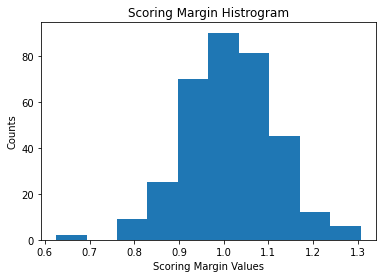

In [25]:
importlib.reload(myutils)
importlib.reload(plot_utils)
scoring_margin = ncaa_stats.get_column("Scoring Margin")
plot_utils.create_histogram("Scoring Margin",scoring_margin)



2. Effective Field Goal Percentage
* Symmetric

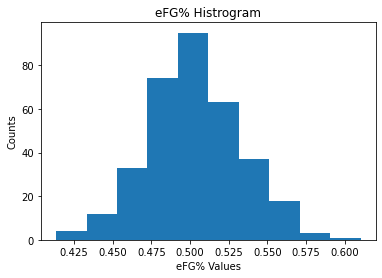

In [26]:
importlib.reload(myutils)
importlib.reload(plot_utils)
efg = ncaa_stats.get_column("eFG%")
plot_utils.create_histogram("eFG%",efg)

3. Steals Per Game + Blocks Per Game
* Skew Right

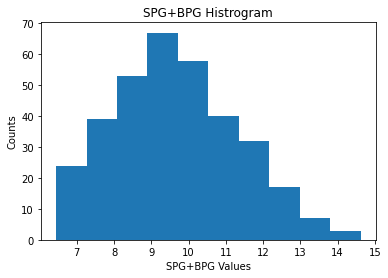

In [27]:
importlib.reload(myutils)
importlib.reload(plot_utils)
spg_bpg = ncaa_stats.get_column("SPG+BPG")
plot_utils.create_histogram("SPG+BPG",spg_bpg)


4. Rebound Margin
* Skew Left

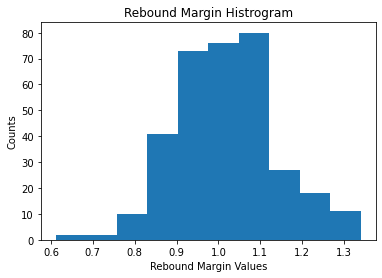

In [28]:
importlib.reload(myutils)
importlib.reload(plot_utils)
rebound_margin = ncaa_stats.get_column("Rebound Margin")
plot_utils.create_histogram("Rebound Margin",rebound_margin)


5. Winning Percentage
* Symmetric

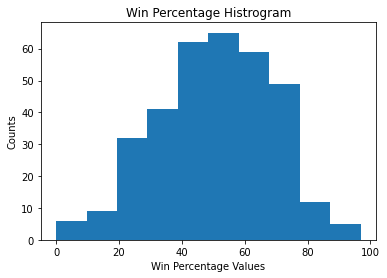

In [29]:
importlib.reload(myutils)
importlib.reload(plot_utils)
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.create_histogram("Win Percentage",win_percentage)

### Analysis
* From looking at the distributions, it looks like there tends to be more data towards middle values and taper off when either going to higher or lower values. There seems to be an outlier in Steals per game + blocks per game in that there are higher values for lower frequencies.

## Scatter Plots

1. Scoring Margin V.S. Win Percentage

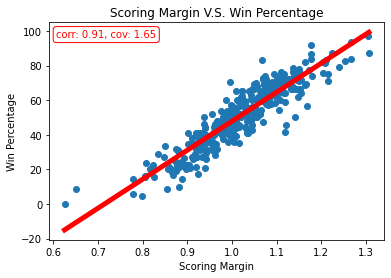

In [30]:
importlib.reload(myutils)
importlib.reload(plot_utils)
import scipy.stats as stats
import numpy as np
scoring_margin = ncaa_stats.get_column("Scoring Margin")
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.draw_scatter_plot(scoring_margin,win_percentage,"Scoring Margin", "Win Percentage")

2. Effective Field Goal Percentage V.S. Win Percentage

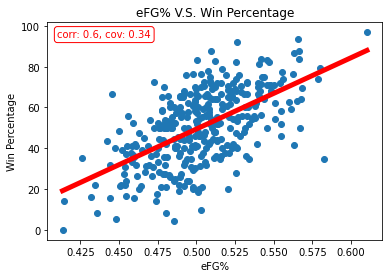

In [31]:
importlib.reload(myutils)
importlib.reload(plot_utils)
import scipy.stats as stats
import numpy as np
efg = ncaa_stats.get_column("eFG%")
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.draw_scatter_plot(efg,win_percentage,"eFG%", "Win Percentage")


3. Steals Per Game + Blocks Per Game V.S. Win Percentage

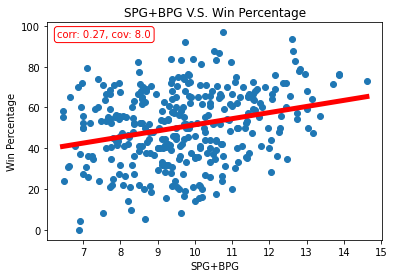

In [32]:
importlib.reload(myutils)
importlib.reload(plot_utils)
import scipy.stats as stats
import numpy as np
spg_bpg = ncaa_stats.get_column("SPG+BPG")
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.draw_scatter_plot(spg_bpg,win_percentage,"SPG+BPG", "Win Percentage")


4. Rebound Margin V.S. Win Percentage

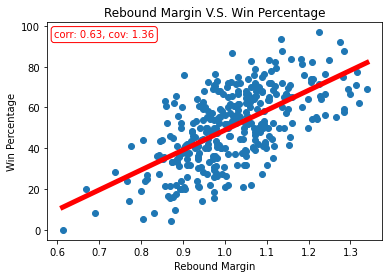

In [33]:
importlib.reload(myutils)
importlib.reload(plot_utils)
import scipy.stats as stats
import numpy as np
rebound_margin = ncaa_stats.get_column("Rebound Margin")
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.draw_scatter_plot(rebound_margin,win_percentage,"Rebound Margin", "Win Percentage")

### Analysis
* Highest to Lowest correlations:

    1. Scoring Margin and Win Percentage

    2. Rebound Margin and Win Percentage

    3. Effective Field Goal Percentage and Win Percentage
    
    4. Steals Per Game + Blocks Per Game and Win Percentage

* Based off of this information, I would hypothesize that a mixture of Scoring Margin and Rebound margin would produce most accurate results in determining the winning percentage of a team due to the high correlation rate that they hold.
* We ultimately ended up deciding to cutout the scoring margin attribute due to the likelihood that it would overshadow the rest of the attributes. This was trivial because teams that scored more than their opponents won their games.

## Determining Discretezation Bins

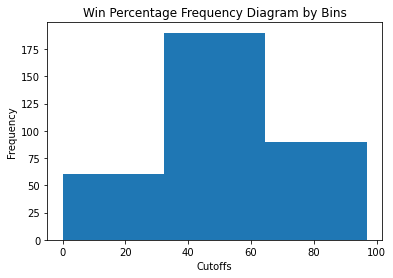

In [34]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 3)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()


* 4 bins

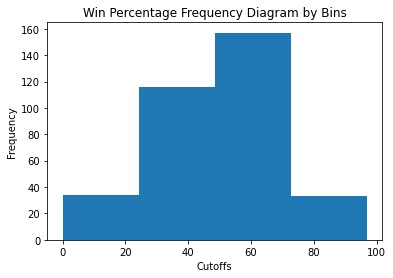

In [35]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 4)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 5 bins

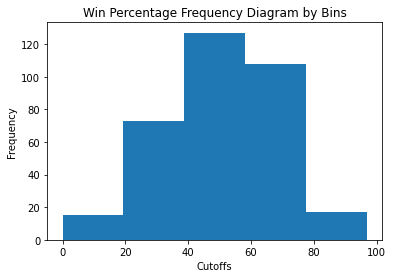

In [36]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 5)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 6 bins

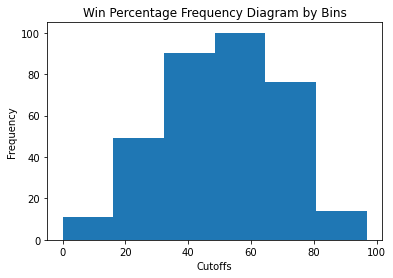

In [37]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 6)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 7 bins

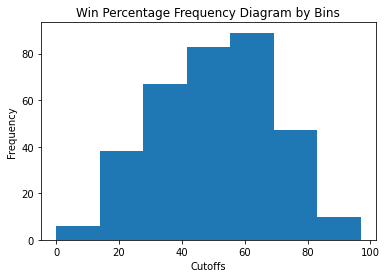

In [38]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 7)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 8 bins

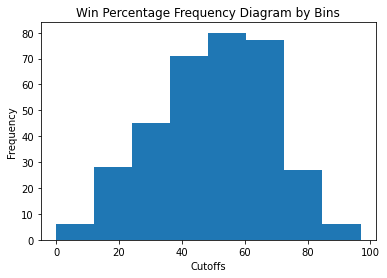

In [39]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 8)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 9 bins

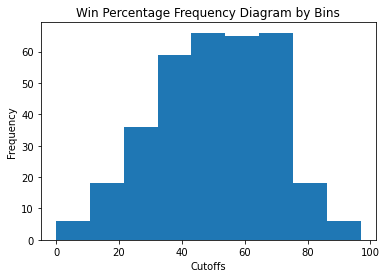

In [40]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 9)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

* 10 bins

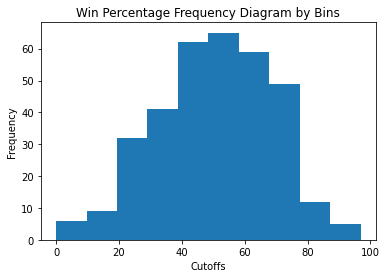

In [41]:
importlib.reload(plot_utils)
percentages = ncaa_stats.get_column("Win Percentage")
cutoffs = plot_utils.compute_equal_width_cutoffs(percentages, 10)
freqs = plot_utils.get_cutoff_frequencies(percentages, cutoffs)
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge")
plt.title("Win Percentage Frequency Diagram by Bins")
plt.xlabel("Cutoffs")
plt.ylabel("Frequency")
print()

### Analysis:
* We decided to go with the four bins option due to the fact that it was not too many or too few. Instead of doing equal width cutoffs, we modalarized it to make it more advanced by that by overriding the cutoff points at which we discretized the data.